In [2]:
%matplotlib inline

# DataFrame
import pandas as pd

# Elasticsearch
from elasticsearch import Elasticsearch, helpers

# datetime
from datetime import datetime

# isnan()
import math

# plot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# OneClassSVM
# from sklearn.svm import OneClassSVM

# stats
# from scipy import stats

plt.style.use('ggplot')

1.  MWT2_a -> MWT2_b


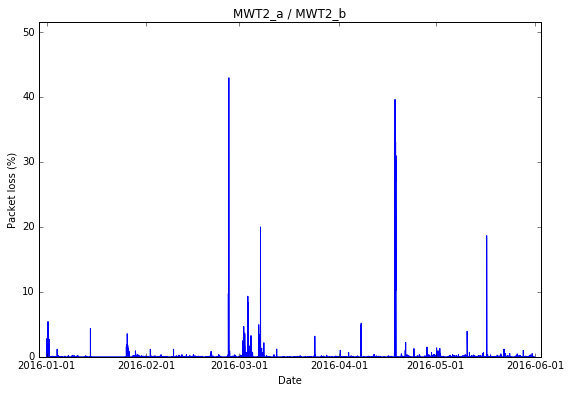

2.  MWT2_a -> MWT2_c


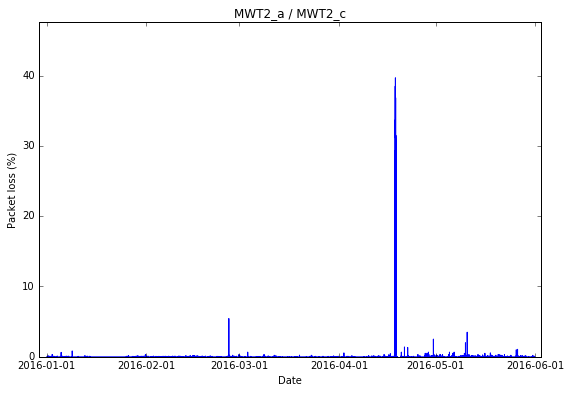

3.  MWT2_a -> SFU


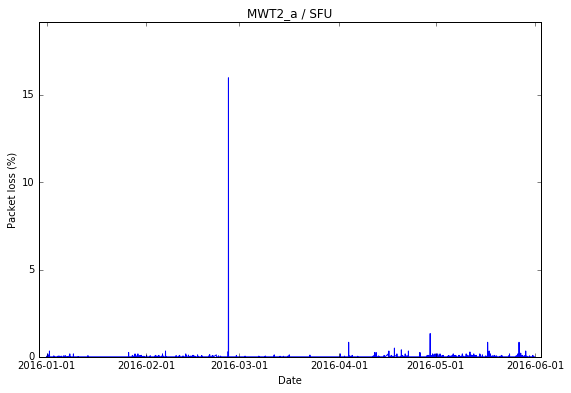

4.  MWT2_a -> CERN


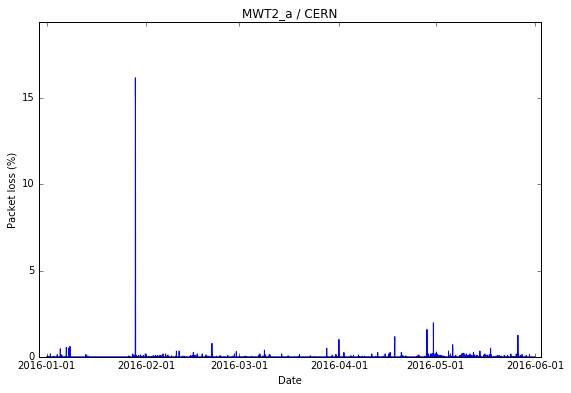

5.  MWT2_a -> BEIJING


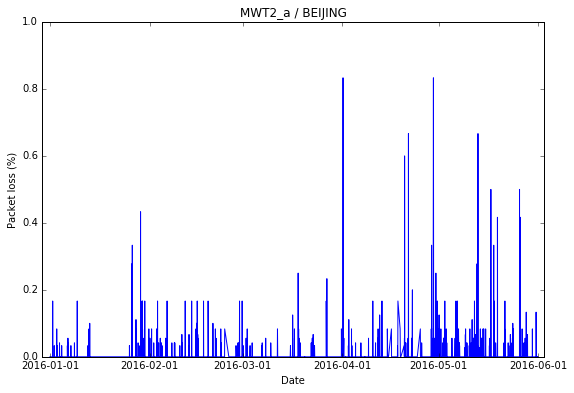

6.  MWT2_b -> MWT2_a


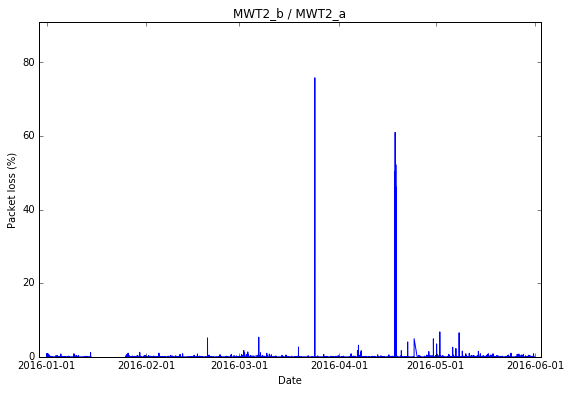

7.  MWT2_b -> MWT2_c


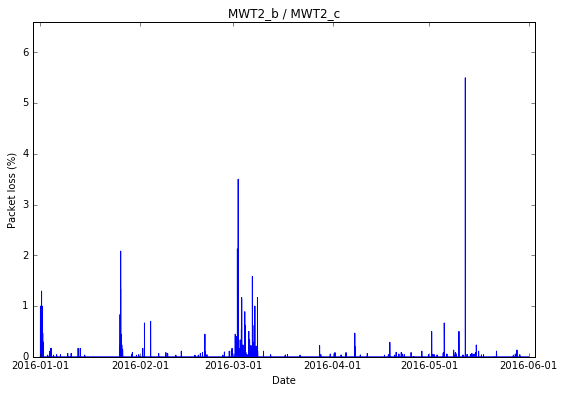

8.  MWT2_b -> SFU


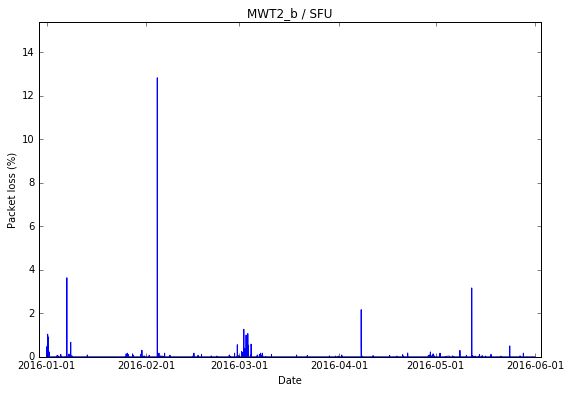

9.  MWT2_b -> CERN


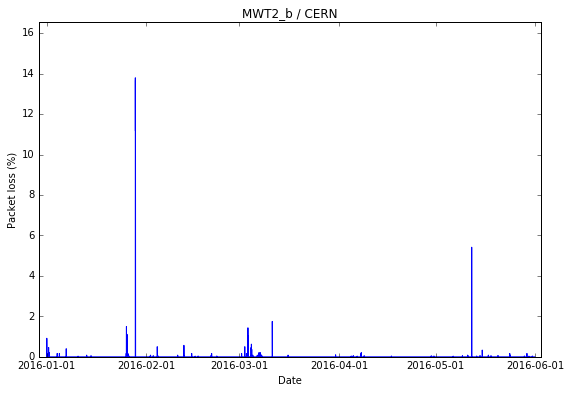

10.  MWT2_b -> BEIJING


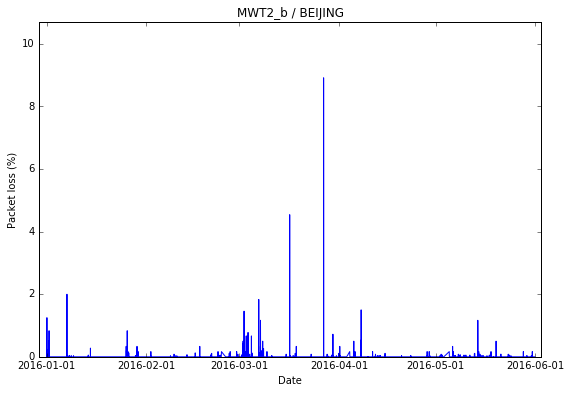

11.  MWT2_c -> MWT2_a


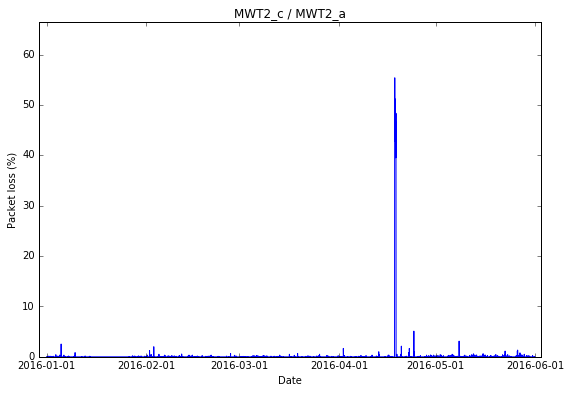

12.  MWT2_c -> MWT2_b


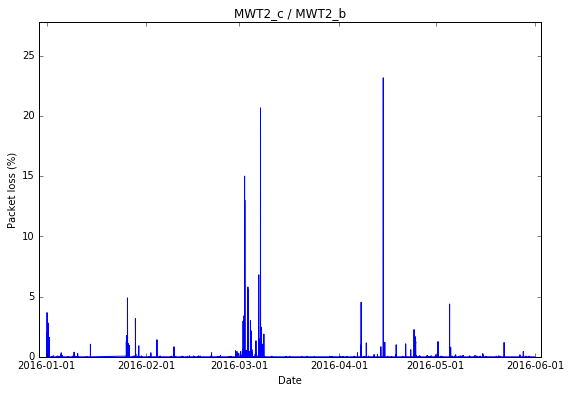

13.  MWT2_c -> SFU


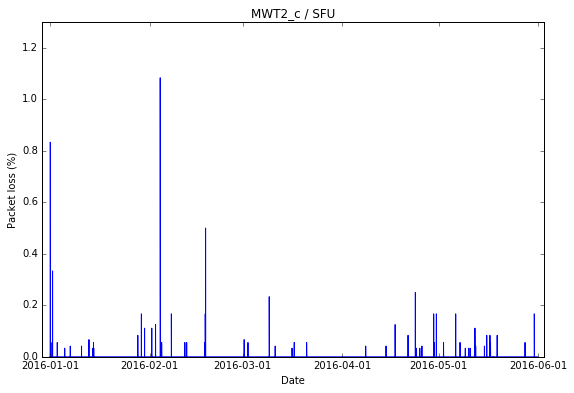

14.  MWT2_c -> CERN


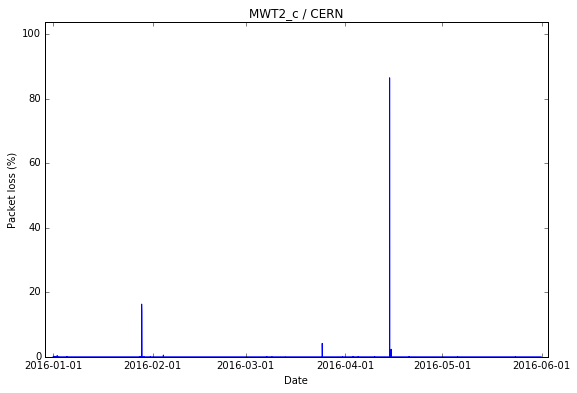

15.  MWT2_c -> BEIJING


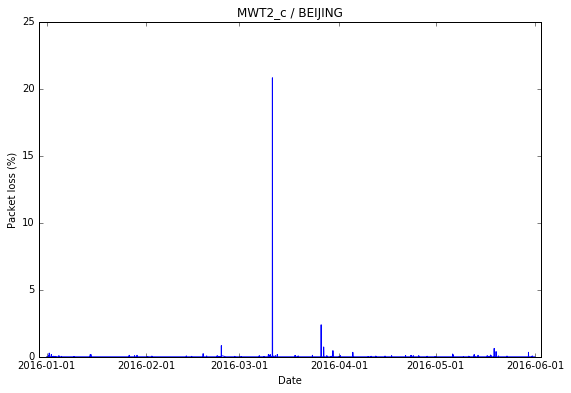

16.  SFU -> MWT2_a


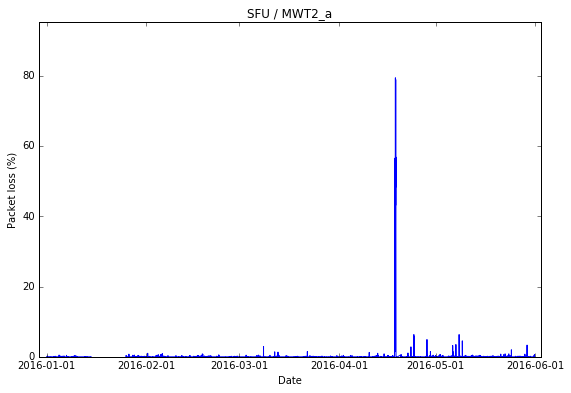

17.  SFU -> MWT2_b


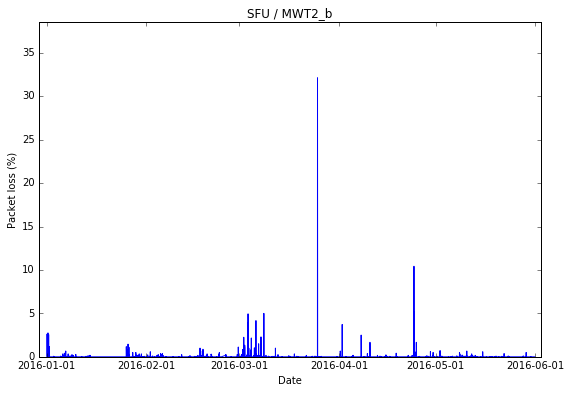

18.  SFU -> MWT2_c


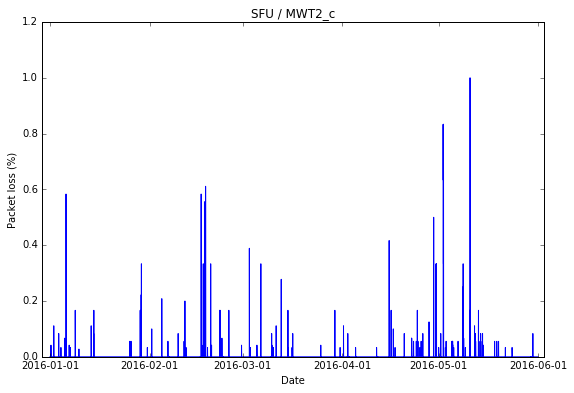

19.  SFU -> CERN


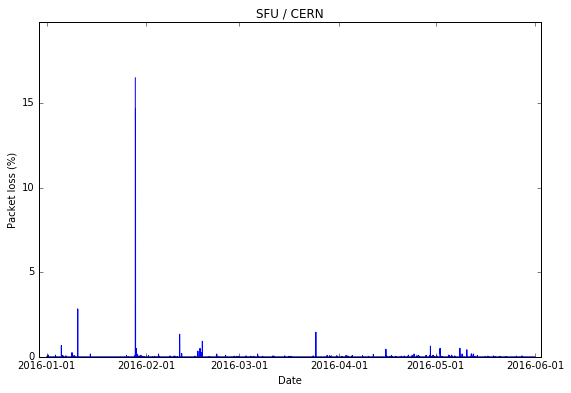

20.  SFU -> BEIJING


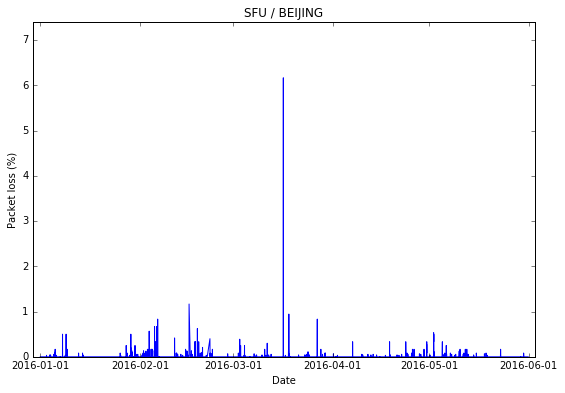

21.  CERN -> MWT2_a


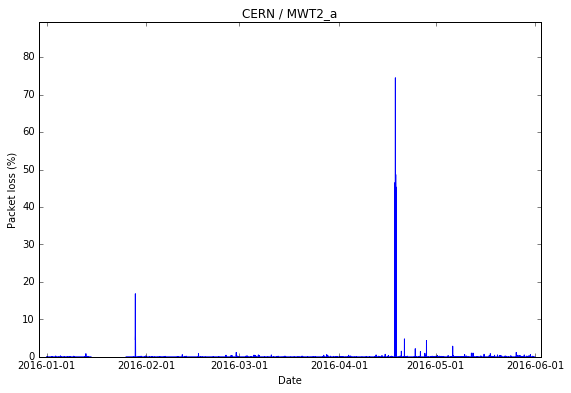

22.  CERN -> MWT2_b


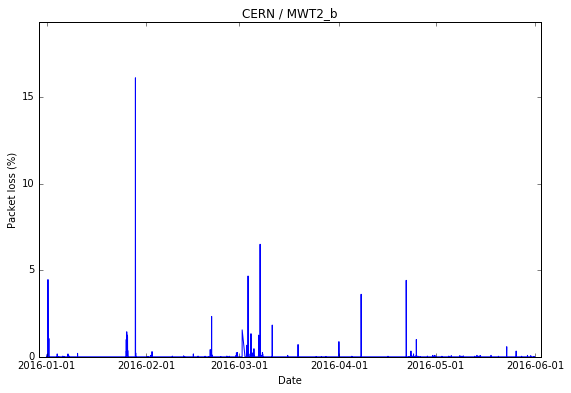

23.  CERN -> MWT2_c


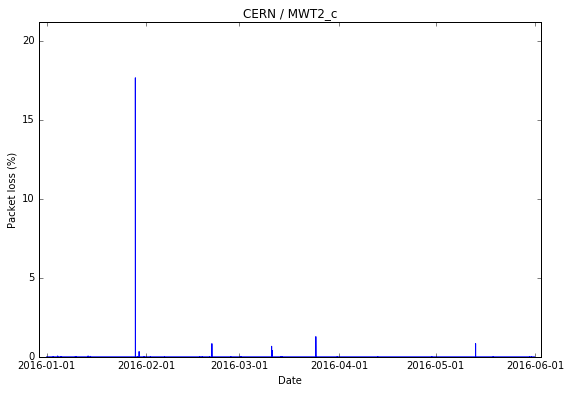

24.  CERN -> SFU


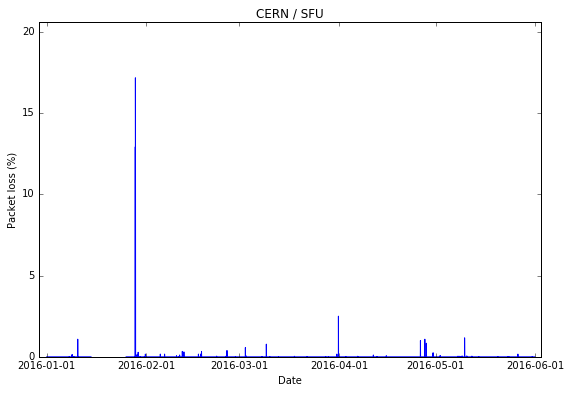

25.  CERN -> BEIJING


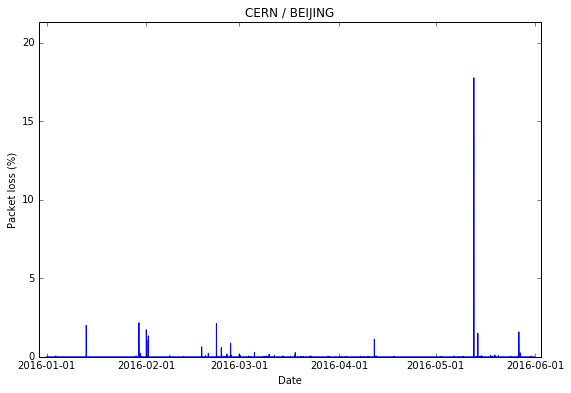

26.  BEIJING -> MWT2_a


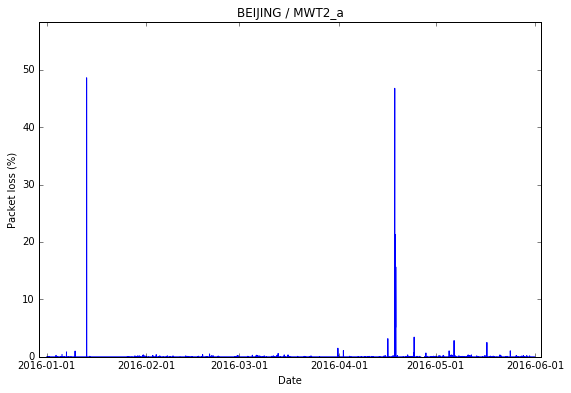

27.  BEIJING -> MWT2_b


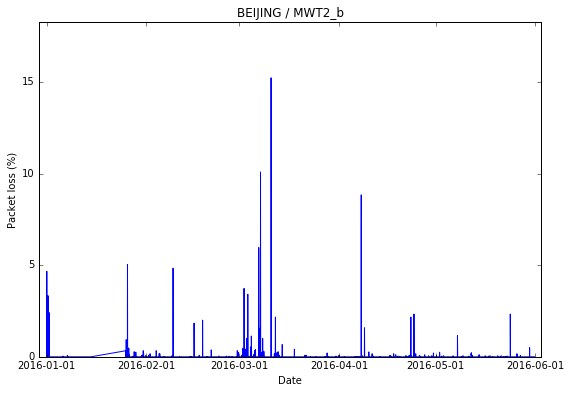

28.  BEIJING -> MWT2_c


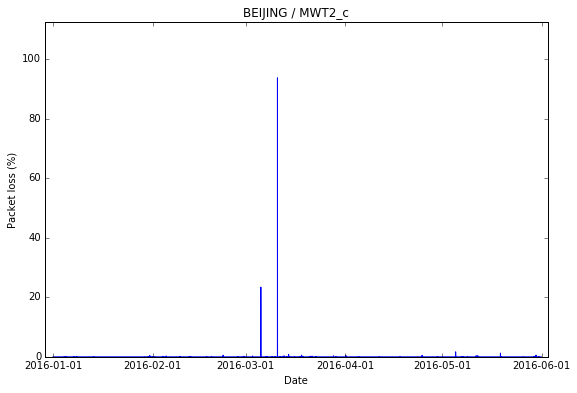

29.  BEIJING -> SFU


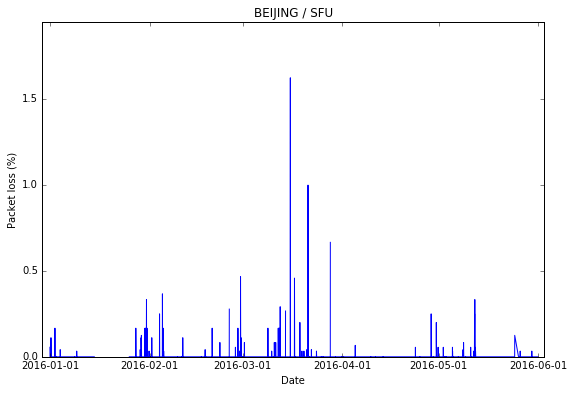

30.  BEIJING -> CERN


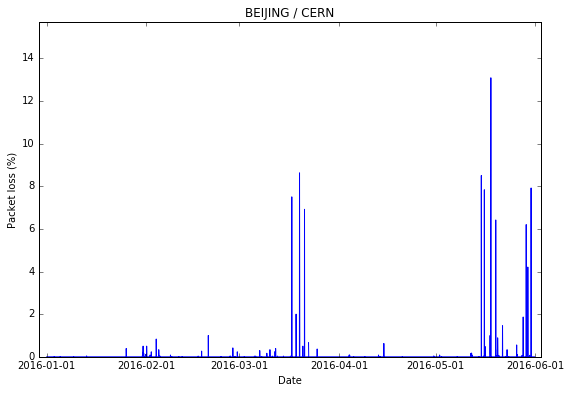

In [2]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
#             data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
#             time_t = data_t.index
#             tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            
            

            dm_median = dm.median()
            pl_median = pl.median()


            set_dm = set()
            set_pl = set()
#             set_both = set()
            
            
            row = data_lpl.shape[0]
            for r in range(row):
                line = data_lpl.iloc[r]
                value1 = abs(line['delay_median'] - dm_median)
                value2 = abs(line['packet_loss'] * 100 - pl_median)
#                 flag1 = False
#                 flag2 = False
                if value1 > 5:
                    set_dm.add(data_lpl.index[r])
#                     flag1 = True
                if value2 > 2:
                    set_pl.add(data_lpl.index[r])
                
            
            plt.figure(figsize=[9, 6])
            
#             plt.subplot(4, 1, 1)
#             plt.plot(time_lpl, dm, label='delay (ms)')
#             plt.ylabel('Delay (ms)')
#             plt.ylim([0, dm.max() * 1.2])
#             #plt.ylim([0, 6])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(1, 1, 1)
            plt.plot(time_lpl, pl, label='Packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)

            
    
#             plt.subplot(4, 1, 3)
#             for t in set_dm:
#                 plt.axvline(x=t, ymin=0, ymax=1, color='r')
#             for t in set_pl:
#                 plt.axvline(x=t, ymin=0, ymax=1, color='y')
# #             for t in set_both:
# #                 plt.axvline(x=t, ymin=0, ymax=1, color='r')
# #             plt.ylabel('Anomaly events (black=latency, yellow=packet loss, red=both)')
#             plt.ylabel('Anomaly events')
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            
            
#             plt.subplot(4, 1, 4)
#             plt.plot(time_t, tp, label='throughput (GB/s)')
#             plt.ylabel('Throughput (GB/s)')
#             plt.ylim([0, tp.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
#             plt.savefig( 'anomaly_det.pdf' )
            plt.show()

## Packet loss: binned hourly, triger alert if mean is > 2%, do not alert again for following day

1.  MWT2_a -> MWT2_b


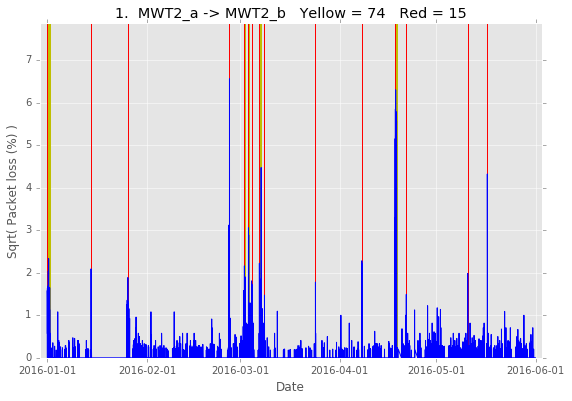

2.  MWT2_a -> MWT2_c


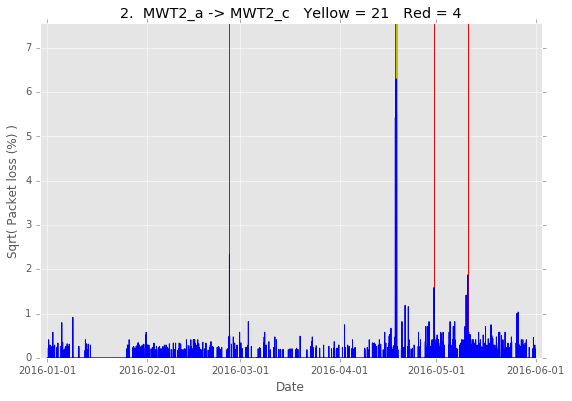

3.  MWT2_a -> SFU


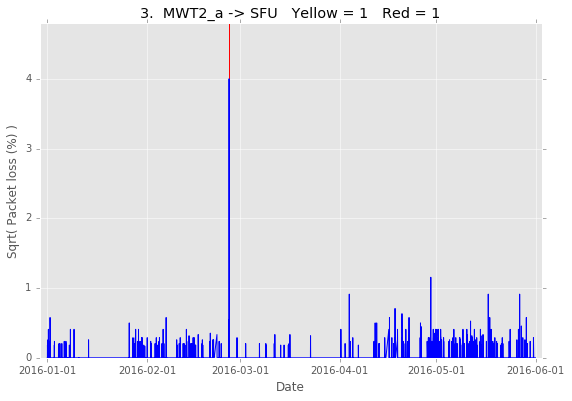

4.  MWT2_a -> CERN


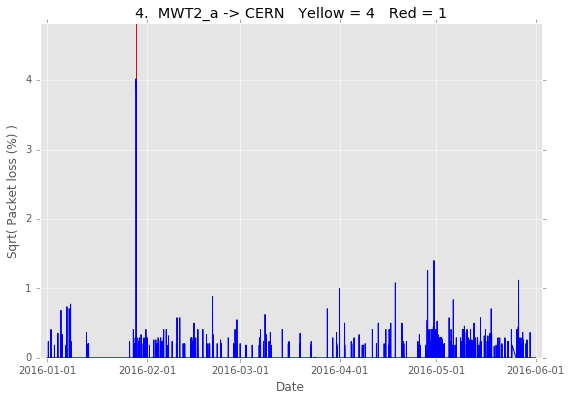

5.  MWT2_a -> BEIJING


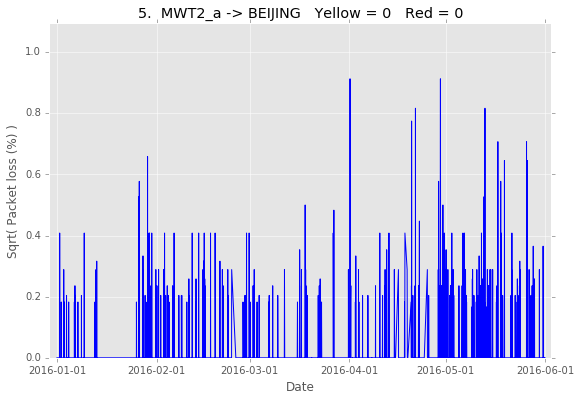

6.  MWT2_b -> MWT2_a


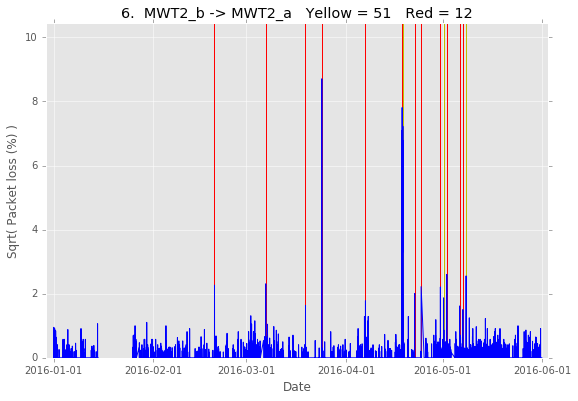

7.  MWT2_b -> MWT2_c


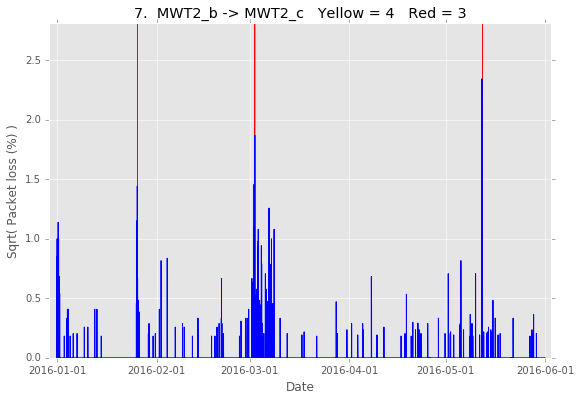

8.  MWT2_b -> SFU


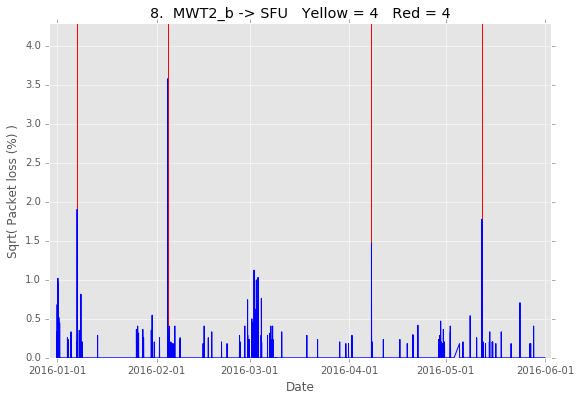

9.  MWT2_b -> CERN


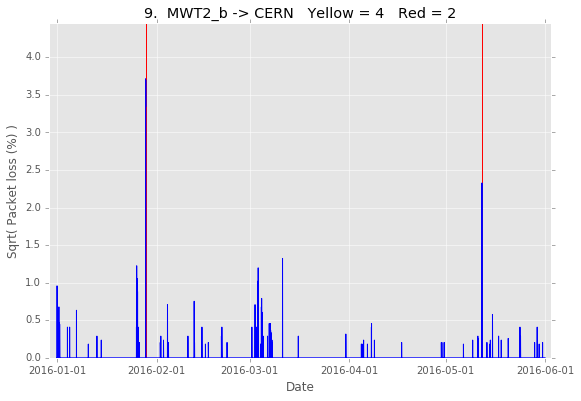

10.  MWT2_b -> BEIJING


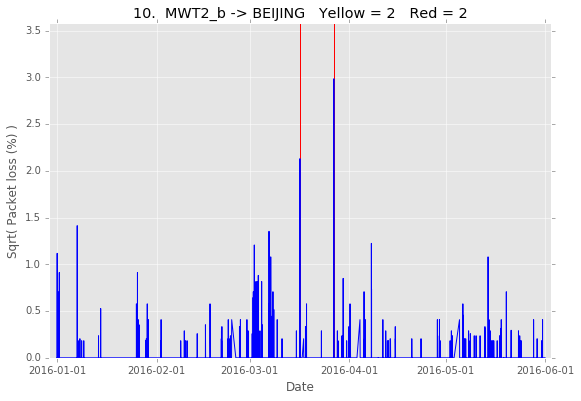

11.  MWT2_c -> MWT2_a


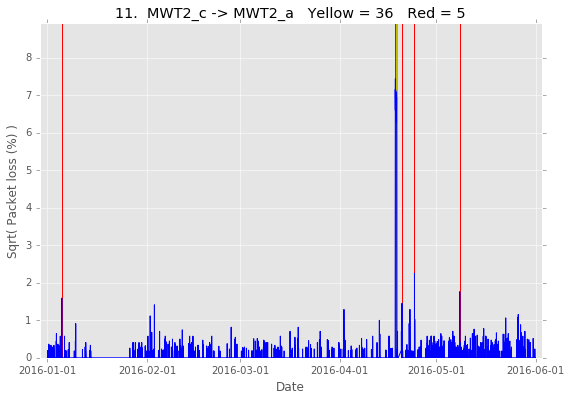

12.  MWT2_c -> MWT2_b


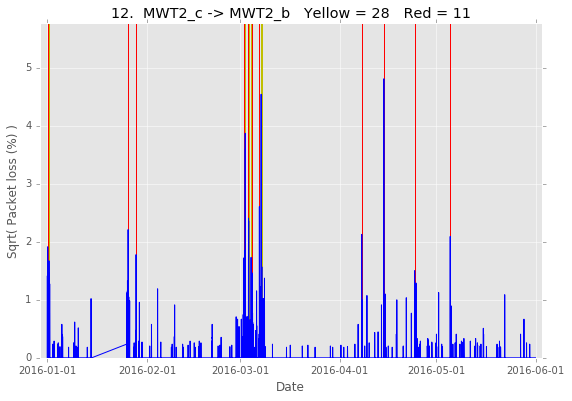

13.  MWT2_c -> SFU


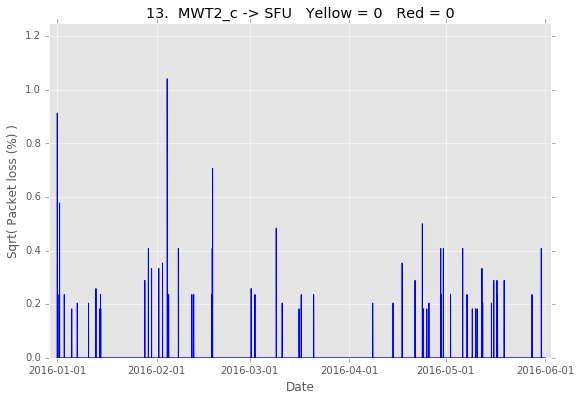

14.  MWT2_c -> CERN


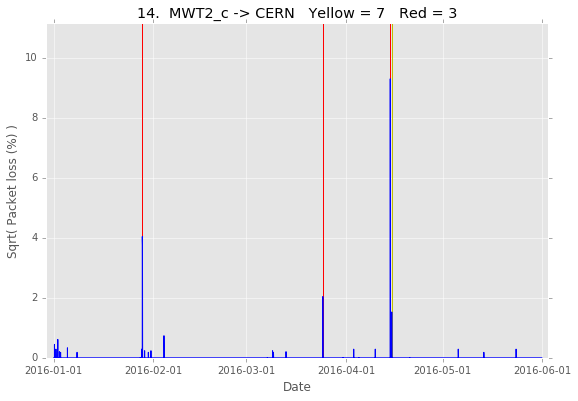

15.  MWT2_c -> BEIJING


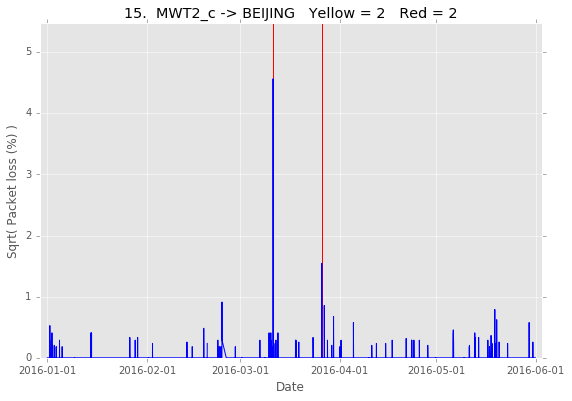

16.  SFU -> MWT2_a


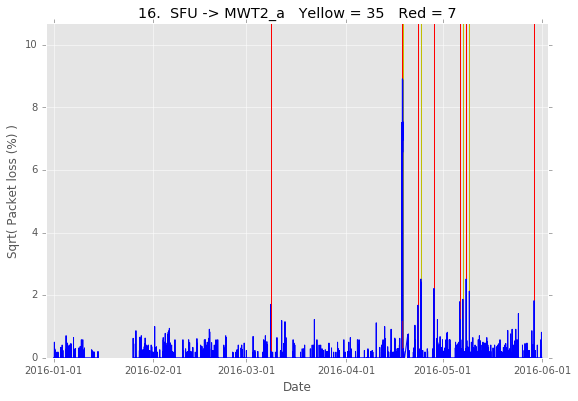

17.  SFU -> MWT2_b


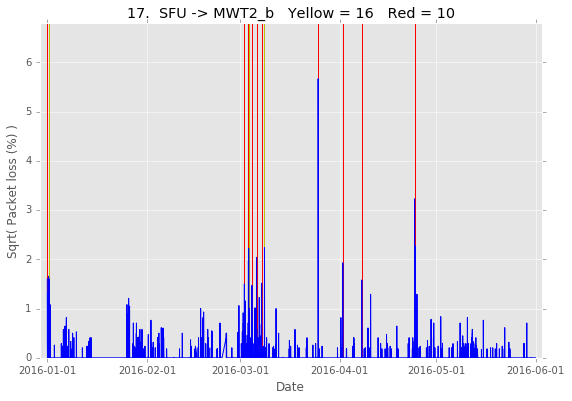

18.  SFU -> MWT2_c


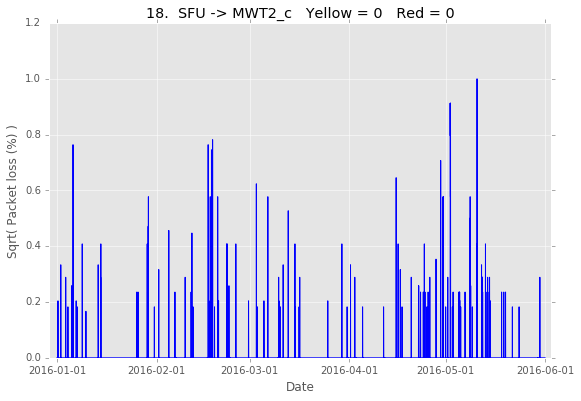

19.  SFU -> CERN


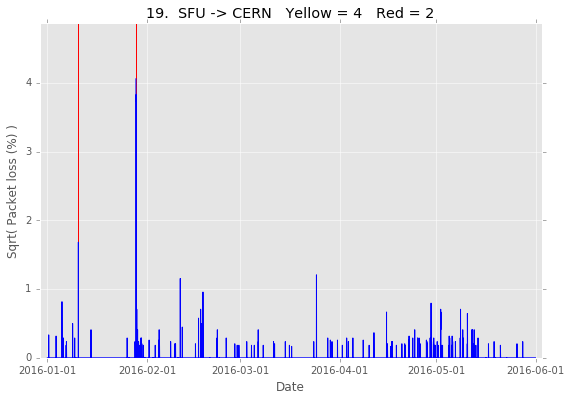

20.  SFU -> BEIJING


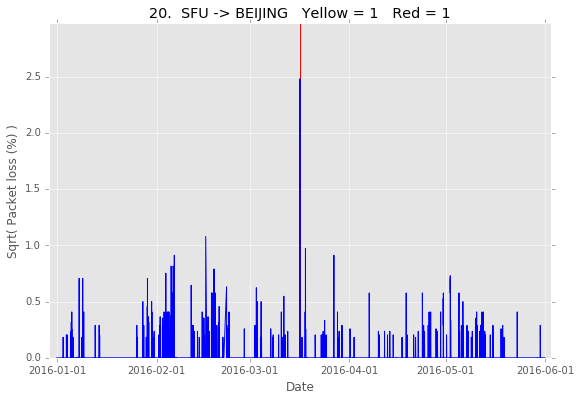

21.  CERN -> MWT2_a


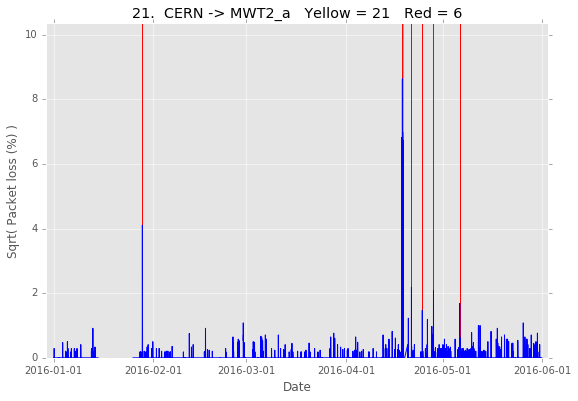

22.  CERN -> MWT2_b


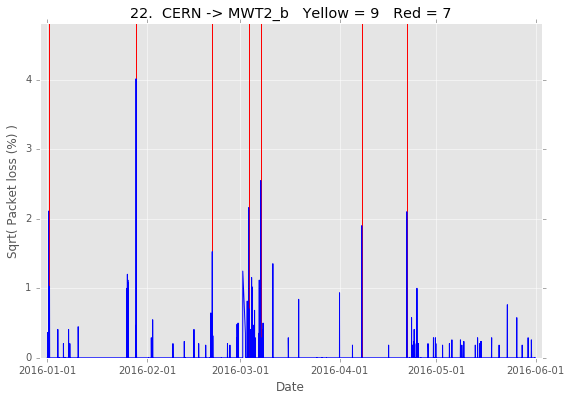

23.  CERN -> MWT2_c


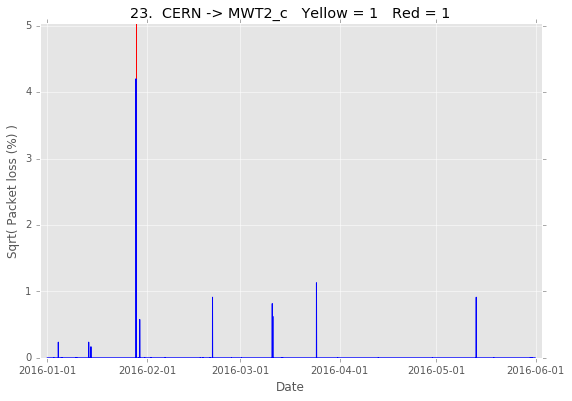

24.  CERN -> SFU


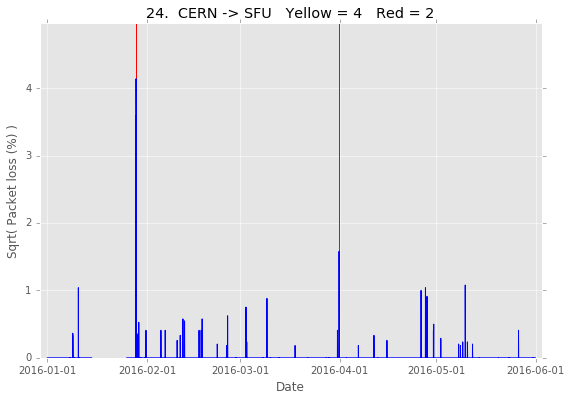

25.  CERN -> BEIJING


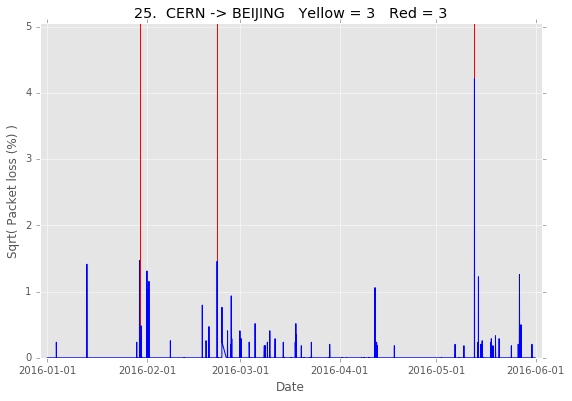

26.  BEIJING -> MWT2_a


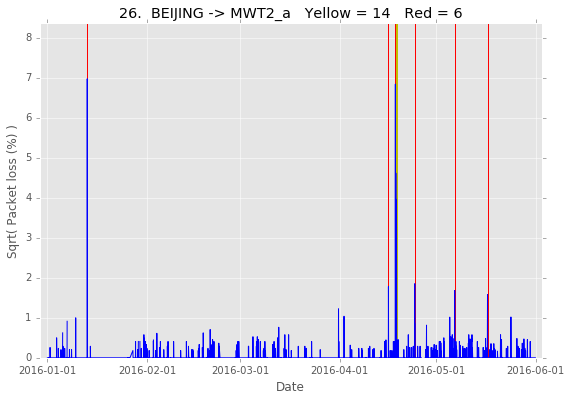

27.  BEIJING -> MWT2_b


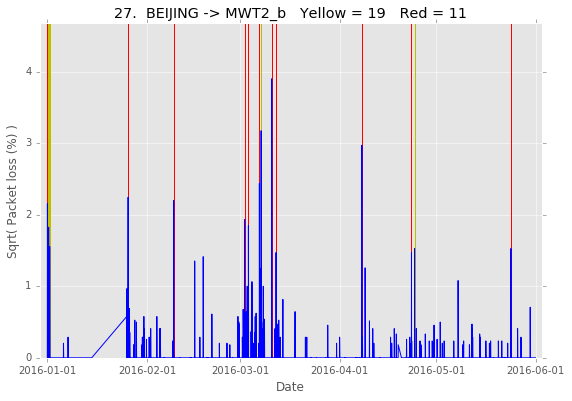

28.  BEIJING -> MWT2_c


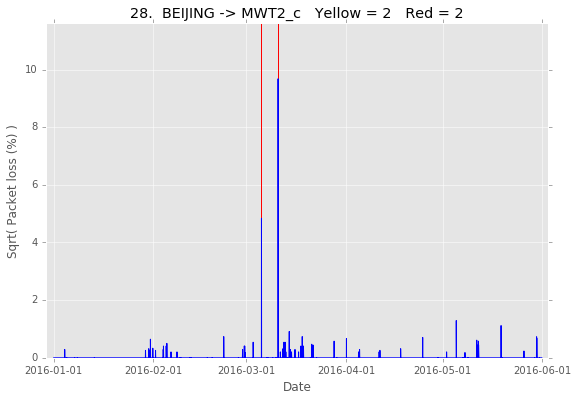

29.  BEIJING -> SFU


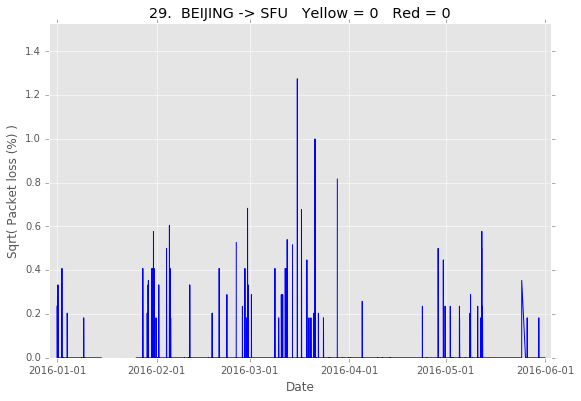

30.  BEIJING -> CERN


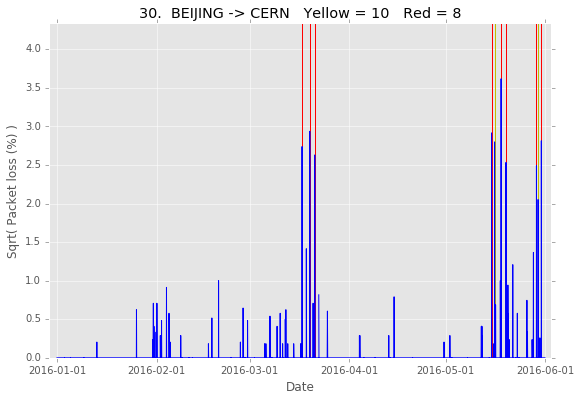

In [32]:
list_name = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
list_ip = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170'] # latency and packet loss server

x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']

cooldown_time = 1 * 24 * 60 * 60 * 1000   # one day, any new alert in this cooldown time is ignored
last_alert_time = 0

count_global = 0
src_index = -1
for src_ip in list_ip:
    src_index += 1
    dest_index = -1
    for dest_ip in list_ip:
        dest_index += 1
        if src_ip != dest_ip:
            count_global += 1
            print('{}.  {} -> {}'.format(count_global, list_name[src_index], list_name[dest_index]))
            data = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(list_ip[src_index], list_ip[dest_index]))
            
            time = data.index
            pl = data.packet_loss * 100
            
            time_abnormal = time[pl > 2]
            
#             print('The size of abnormal pl time is {}'.format(len(time_abnormal)))
            
            plt.figure(figsize=[9, 6])
#             plt.plot(time, pl, label='Packet loss (%)')
#             plt.ylabel('Packet loss (%)')
            plt.ylabel('Sqrt( Packet loss (%) )')
#             plt.ylabel('Logxxx( Packet loss (%) )')
            plt.xlabel('Date')
            plt.ylim([0, np.sqrt(pl).max() * 1.2])
#             plt.ylim([0, np.log2(pl).max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
#             print(time_abnormal)
            for t in time_abnormal:
                plt.axvline(x=t, ymin=0, ymax=10000, color='y')
            
            last_alert_time = 0
            red = 0
            for t in time_abnormal:
                if t - last_alert_time > cooldown_time:
                    last_alert_time = t
                    plt.axvline(x=t, ymin=0, ymax=10000, color='r')
                    red += 1
            
#             plt.plot(time, pl, label='xxxxxx', color='b')
            plt.plot(time, np.sqrt(pl), label='xxxxxx', color='b')
#             plt.semilogy(time, pl, label='xxxxxx', color='b')

            plt.title('{}.  {} -> {}   Yellow = {}   Red = {}'.format(count_global, list_name[src_index], list_name[dest_index], len(time_abnormal), red))
            
            plt.show()
            
            
            

# For NA Throughput Meeting 08/16/2016

1.  MWT2_a -> MWT2_b


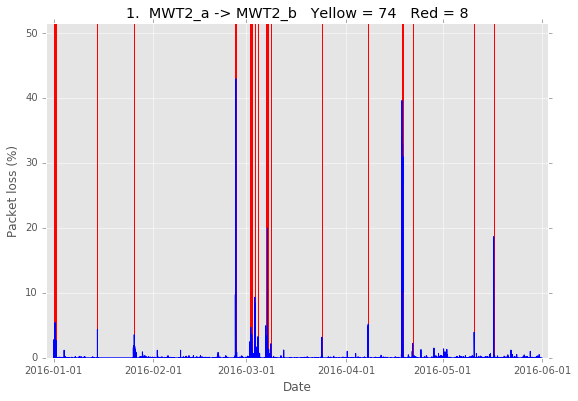

2.  MWT2_a -> MWT2_c


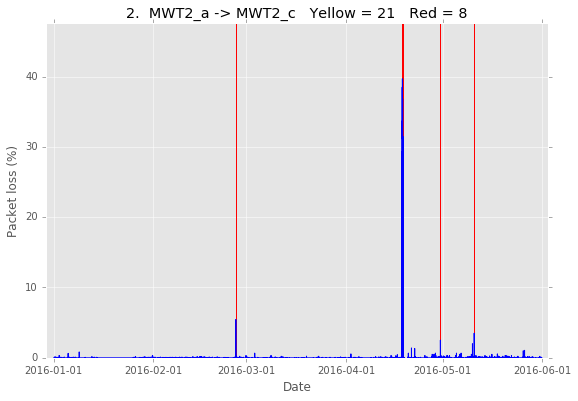

3.  MWT2_a -> SFU


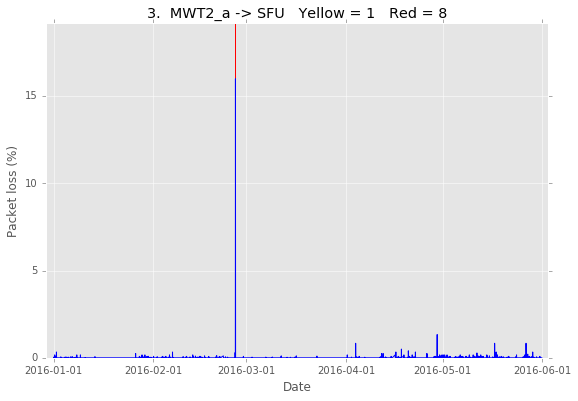

4.  MWT2_a -> CERN


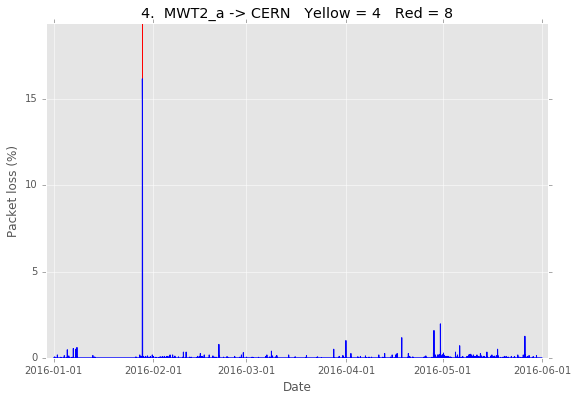

5.  MWT2_a -> BEIJING


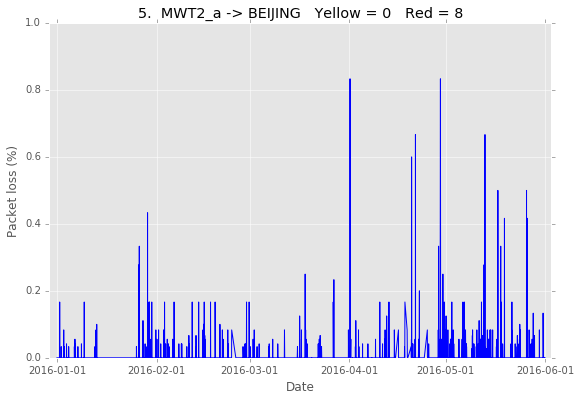

6.  MWT2_b -> MWT2_a


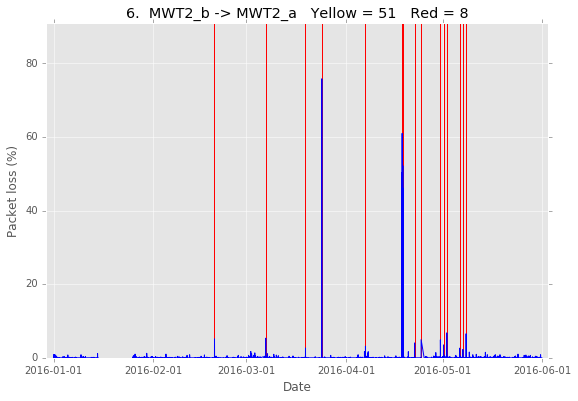

7.  MWT2_b -> MWT2_c


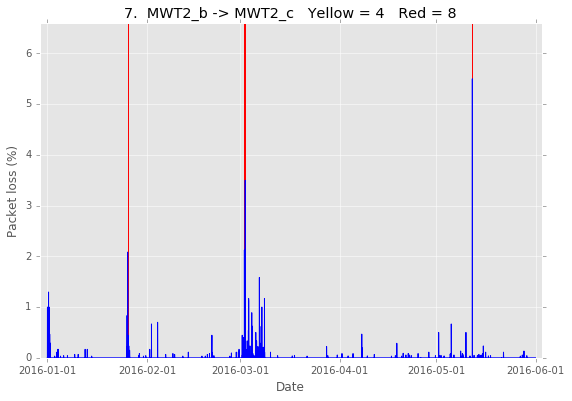

8.  MWT2_b -> SFU


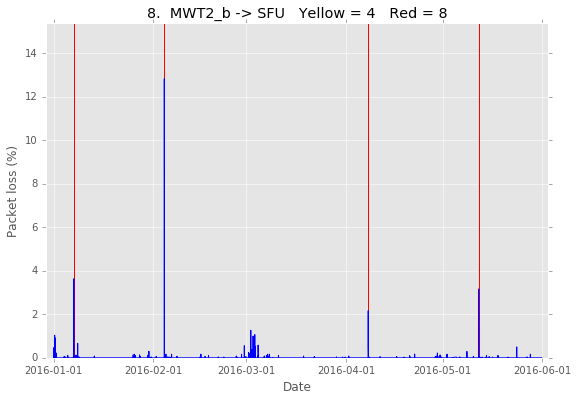

9.  MWT2_b -> CERN


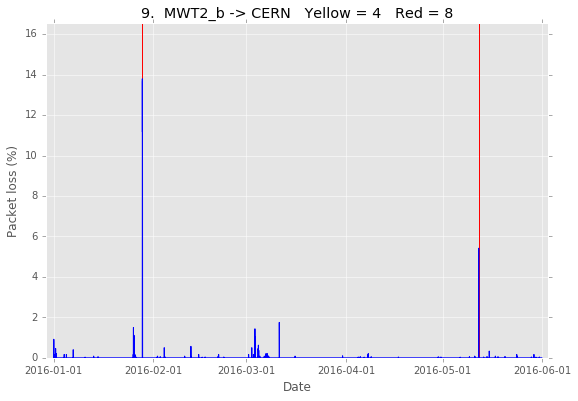

10.  MWT2_b -> BEIJING


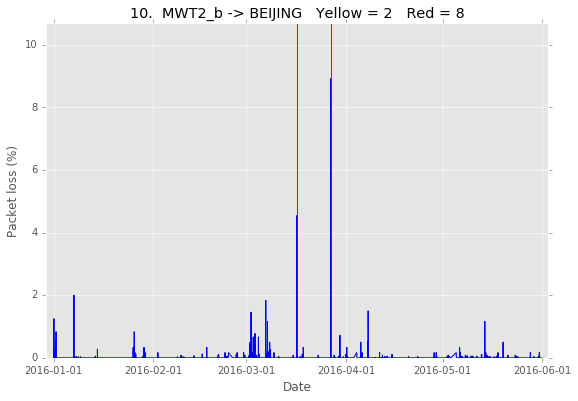

11.  MWT2_c -> MWT2_a


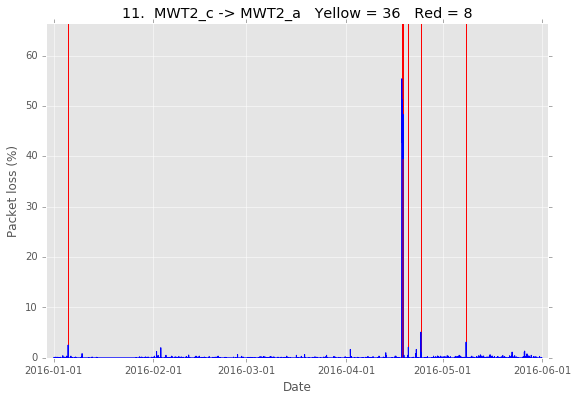

12.  MWT2_c -> MWT2_b


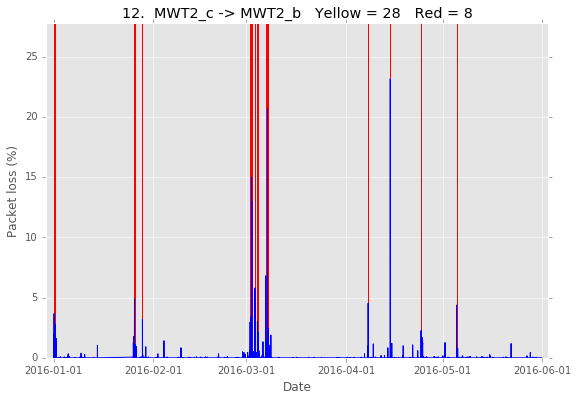

13.  MWT2_c -> SFU


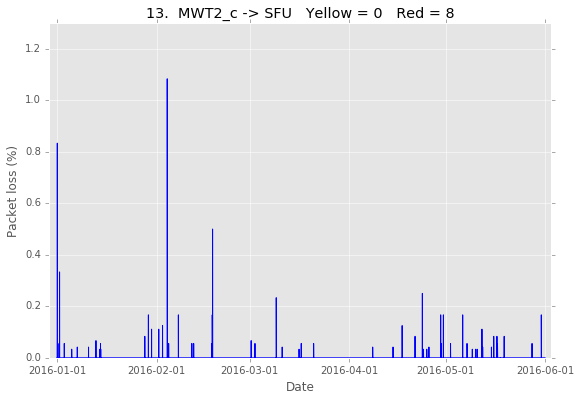

14.  MWT2_c -> CERN


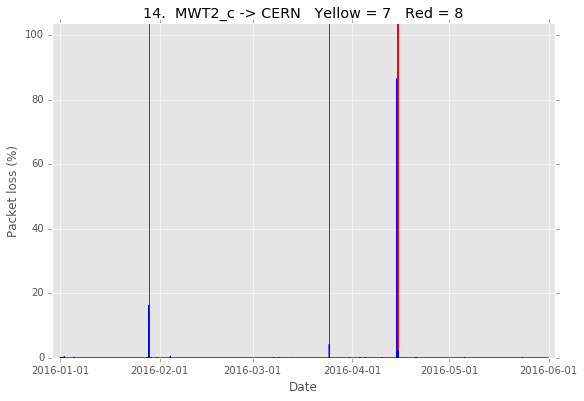

15.  MWT2_c -> BEIJING


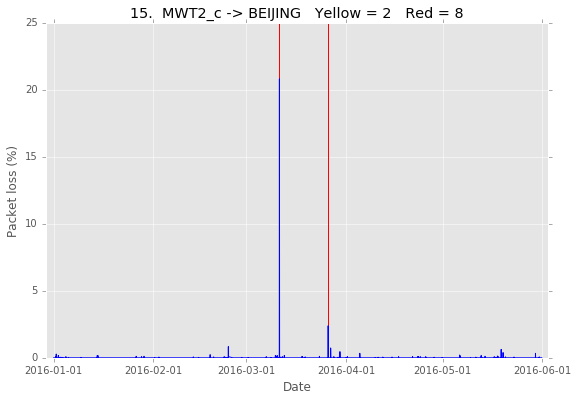

16.  SFU -> MWT2_a


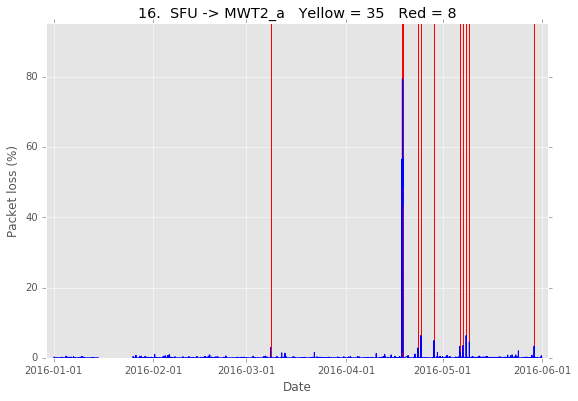

17.  SFU -> MWT2_b


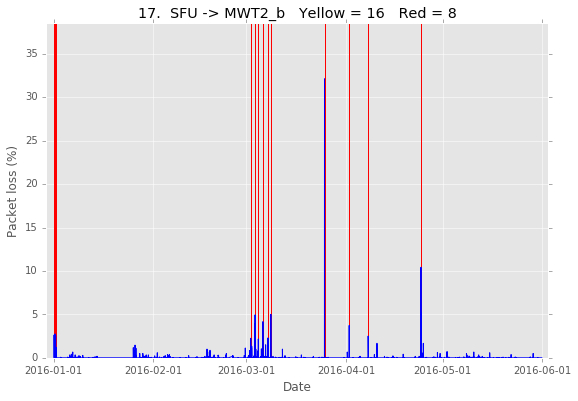

18.  SFU -> MWT2_c


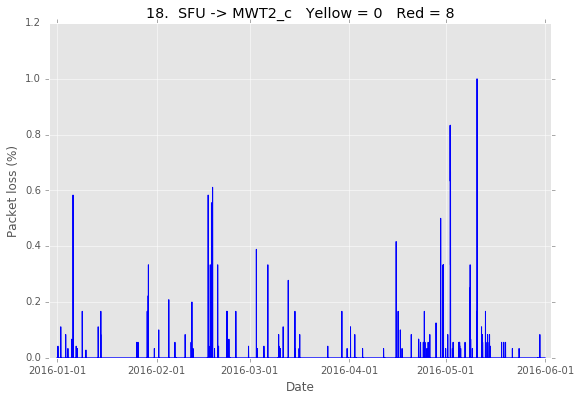

19.  SFU -> CERN


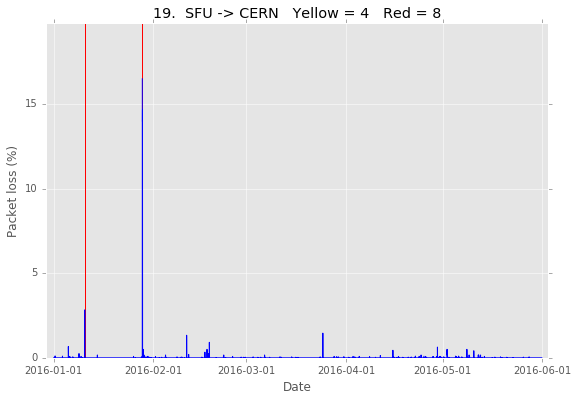

20.  SFU -> BEIJING


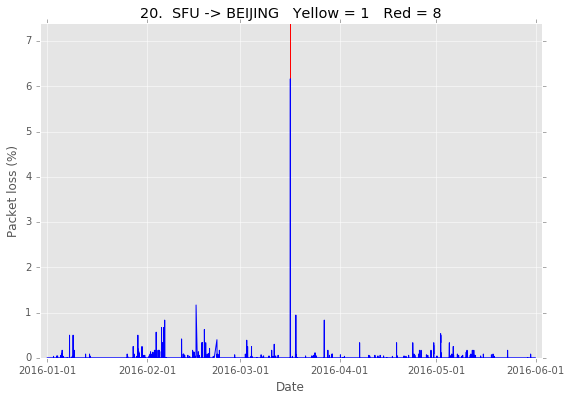

21.  CERN -> MWT2_a


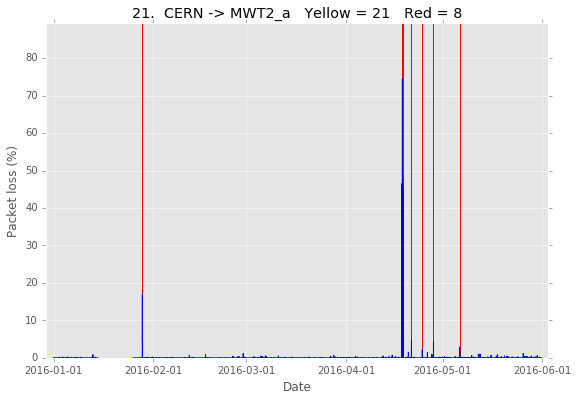

22.  CERN -> MWT2_b


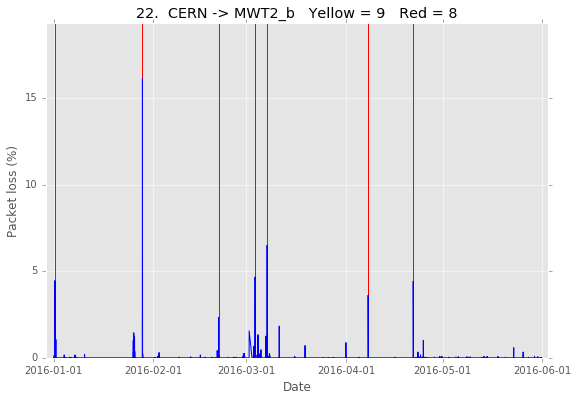

23.  CERN -> MWT2_c


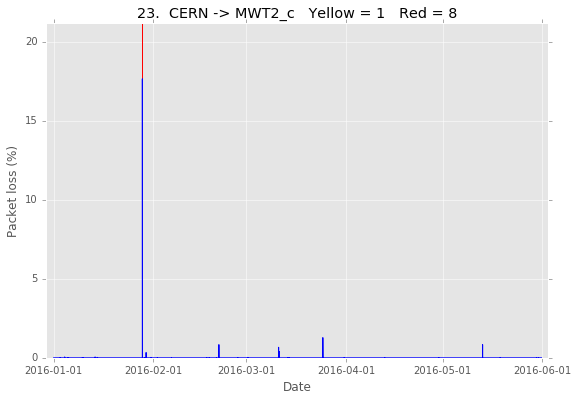

24.  CERN -> SFU


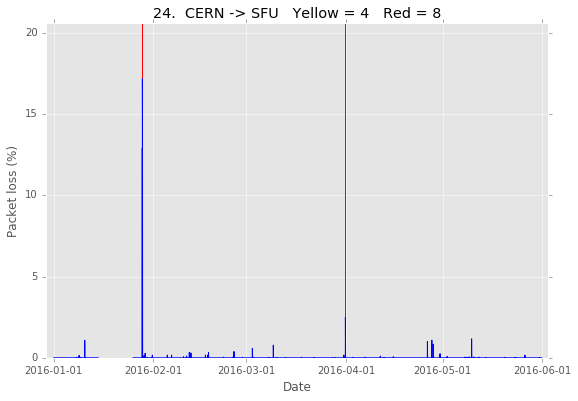

25.  CERN -> BEIJING


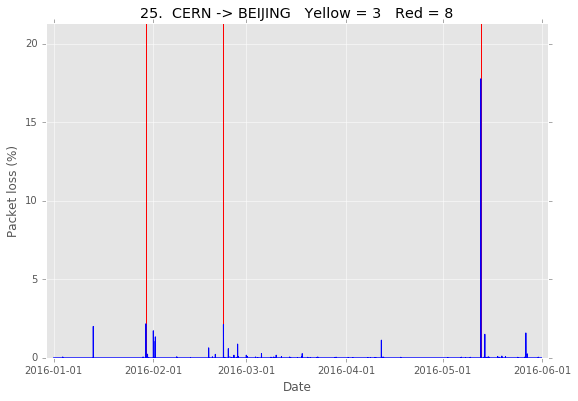

26.  BEIJING -> MWT2_a


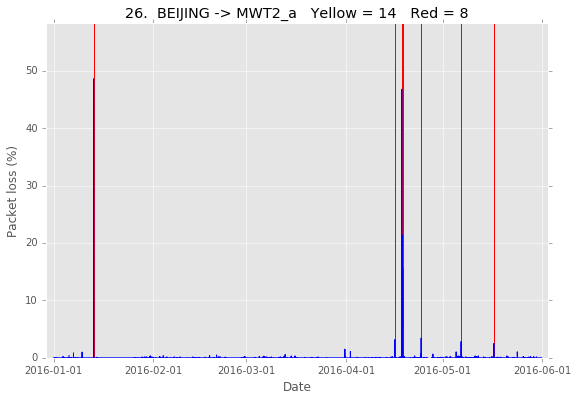

27.  BEIJING -> MWT2_b


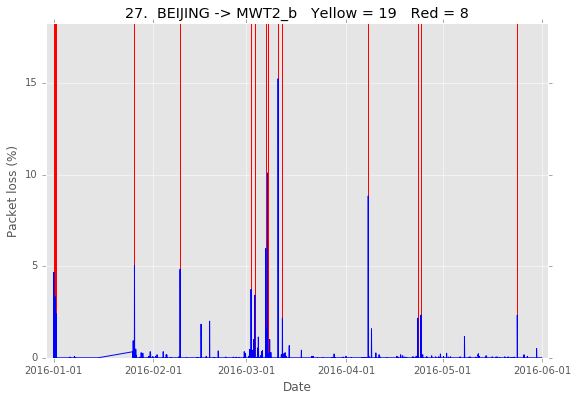

28.  BEIJING -> MWT2_c


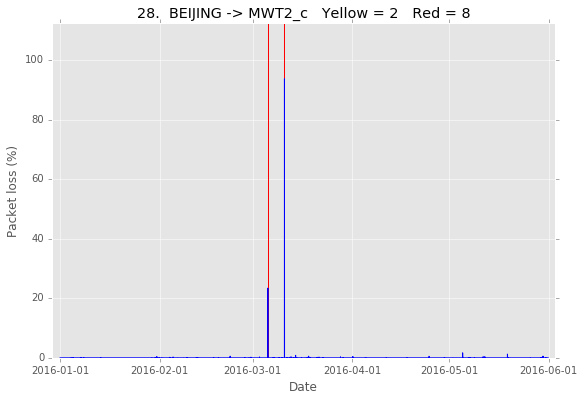

29.  BEIJING -> SFU


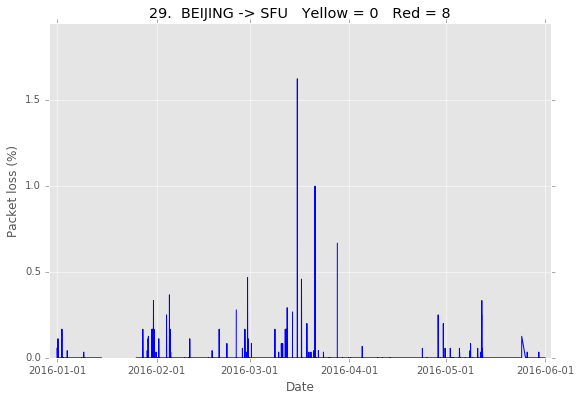

30.  BEIJING -> CERN


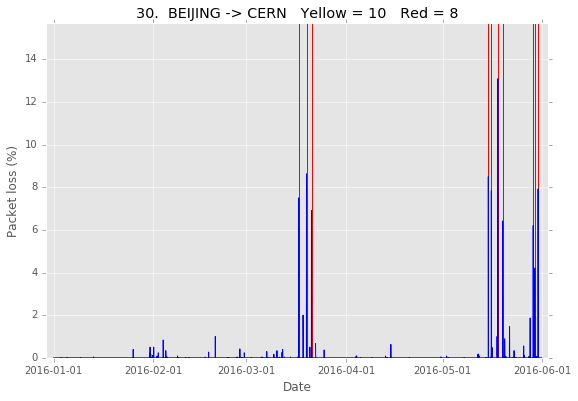

In [5]:
list_name = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
list_ip = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170'] # latency and packet loss server

x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']

cooldown_time = 1 * 24 * 60 * 60 * 1000   # one day, any new alert in this cooldown time is ignored
last_alert_time = 0

count_global = 0
src_index = -1
for src_ip in list_ip:
    src_index += 1
    dest_index = -1
    for dest_ip in list_ip:
        dest_index += 1
        if src_ip != dest_ip:
            count_global += 1
            print('{}.  {} -> {}'.format(count_global, list_name[src_index], list_name[dest_index]))
            data = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(list_ip[src_index], list_ip[dest_index]))
            
            time = data.index
            pl = data.packet_loss * 100
            
            time_abnormal = time[pl > 2]
            
#             print('The size of abnormal pl time is {}'.format(len(time_abnormal)))
            
            plt.figure(figsize=[9, 6])
#             plt.plot(time, pl, label='Packet loss (%)')
            plt.ylabel('Packet loss (%)')
#             plt.ylabel('Sqrt( Packet loss (%) )')
#             plt.ylabel('Logxxx( Packet loss (%) )')
            plt.xlabel('Date')
#             plt.ylim([0, np.sqrt(pl).max() * 1.2])
#             plt.ylim([0, np.log2(pl).max() * 1.2])
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
#             print(time_abnormal)
            for t in time_abnormal:
                plt.axvline(x=t, ymin=0, ymax=10000, color='r')
            
#             last_alert_time = 0
#             red = 0
#             for t in time_abnormal:
#                 if t - last_alert_time > cooldown_time:
#                     last_alert_time = t
#                     plt.axvline(x=t, ymin=0, ymax=10000, color='r')
#                     red += 1
            
            plt.plot(time, pl, label='xxxxxx', color='b')
#             plt.plot(time, np.sqrt(pl), label='xxxxxx', color='b')
#             plt.semilogy(time, pl, label='xxxxxx', color='b')

            plt.title('{}.  {} -> {}   Yellow = {}   Red = {}'.format(count_global, list_name[src_index], list_name[dest_index], len(time_abnormal), red))
            
            plt.show()
            
            

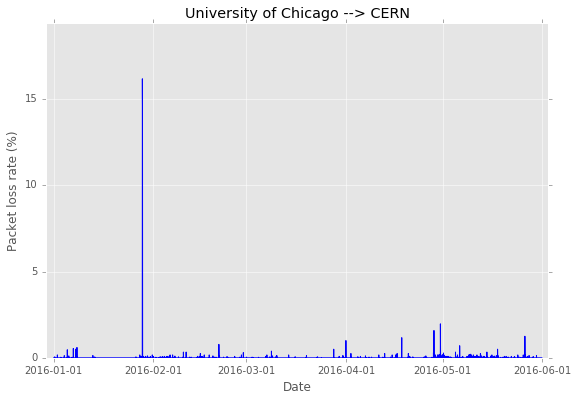

In [11]:
src_ip = '192.170.227.160'
src_name = 'University of Chicago'
dest_ip = '128.142.223.247'
dest_name = 'CERN'

x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']

data = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(src_ip, dest_ip))
time = data.index
pl = data.packet_loss * 100

time_abnormal = time[pl > 2]

plt.figure(figsize=[9, 6])
plt.ylabel('Packet loss rate (%)')
plt.xlabel('Date')
plt.ylim([0, pl.max() * 1.2])
plt.xlim([1451400000000, 1464900000000])
plt.xticks(x, lbl, rotation=0)
plt.title('{} --> {}'.format(src_name, dest_name))
plt.plot(time, pl, color='b')

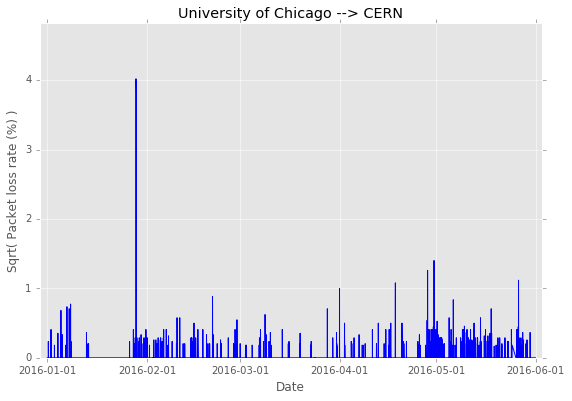

In [12]:
src_ip = '192.170.227.160'
src_name = 'University of Chicago'
dest_ip = '128.142.223.247'
dest_name = 'CERN'

x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']

data = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(src_ip, dest_ip))
time = data.index
pl = data.packet_loss * 100
pl_sqrt = np.sqrt(pl)

time_abnormal = time[pl > 2]

plt.figure(figsize=[9, 6])
plt.ylabel('Sqrt( Packet loss rate (%) )')
plt.xlabel('Date')
plt.ylim([0, pl_sqrt.max() * 1.2])
plt.xlim([1451400000000, 1464900000000])
plt.xticks(x, lbl, rotation=0)
plt.title('{} --> {}'.format(src_name, dest_name))
plt.plot(time, pl_sqrt, color='b')

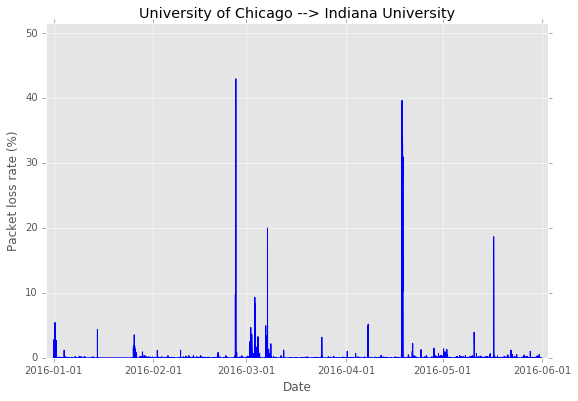

In [13]:
src_ip = '192.170.227.160'
src_name = 'University of Chicago'
dest_ip = '149.165.225.223'
dest_name = 'Indiana University'

x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']

data = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(src_ip, dest_ip))
time = data.index
pl = data.packet_loss * 100

time_abnormal = time[pl > 2]

plt.figure(figsize=[9, 6])
plt.ylabel('Packet loss rate (%)')
plt.xlabel('Date')
plt.ylim([0, pl.max() * 1.2])
plt.xlim([1451400000000, 1464900000000])
plt.xticks(x, lbl, rotation=0)
plt.title('{} --> {}'.format(src_name, dest_name))
plt.plot(time, pl, color='b')

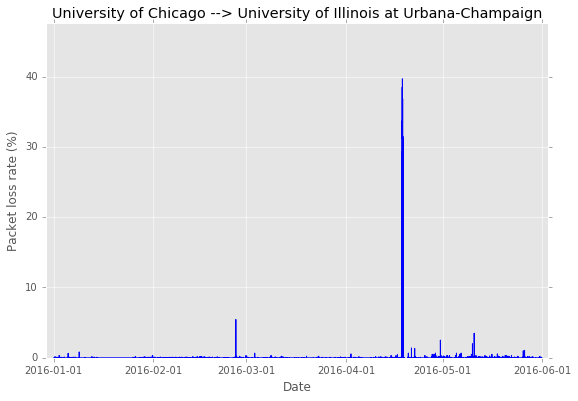

In [14]:
src_ip = '192.170.227.160'
src_name = 'University of Chicago'
dest_ip = '72.36.96.4'
dest_name = 'University of Illinois at Urbana-Champaign'

x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']

data = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(src_ip, dest_ip))
time = data.index
pl = data.packet_loss * 100

time_abnormal = time[pl > 2]

plt.figure(figsize=[9, 6])
plt.ylabel('Packet loss rate (%)')
plt.xlabel('Date')
plt.ylim([0, pl.max() * 1.2])
plt.xlim([1451400000000, 1464900000000])
plt.xticks(x, lbl, rotation=0)
plt.title('{} --> {}'.format(src_name, dest_name))
plt.plot(time, pl, color='b')